# DSCI 617 – Project 02
## Student Grade Database
**Felix Asare**

## Part A: Set up Environment

In [0]:
# import libraries (numpy, matplotlib, SparkSession, col, expr)
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, expr

spark = SparkSession.builder.getOrCreate()


## Part B: Load the Data

accepted, alumni, courses, expelled, faculty, grades, and unretained.

In [0]:
# Accepted schema
accepted_schema = ("acc_term_id STRING, sid INT, first_name STRING, last_name STRING, major STRING")
accepted = (
  spark.read
  .option('delimeter', ',')
  .option('header', 'true')
  .schema(accepted_schema)
  .csv('/FileStore/tables/univ/accepted.csv')
)

accepted.printSchema()



root
 |-- acc_term_id: string (nullable = true)
 |-- sid: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- major: string (nullable = true)



In [0]:
# Alumni schema
alumniSchema = "sid INT"
alumni = (
    spark.read
    .option('delimeter', ',')
    .option("header", "true")
    .schema(alumniSchema)
    .csv('/FileStore/tables/univ/alumni.csv')
)
alumni.printSchema()

root
 |-- sid: integer (nullable = true)



In [0]:
# Expelled schema
expelledSchema = "sid INT"
expelled = (spark.read
  .option("delimeter", ",")
  .option("header", "true")       
  .schema(expelledSchema)
  .csv("/FileStore/tables/univ/expelled.csv")
)

expelled.printSchema()

root
 |-- sid: integer (nullable = true)



In [0]:
unretainedSchema = "sid INT"
unretained = (spark.read
    .option("delimeter", ",")
    .option("header", "true")
    .schema(unretainedSchema)
    .csv("/FileStore/tables/univ/unretained.csv")          
    )

unretained.printSchema()

root
 |-- sid: integer (nullable = true)



In [0]:
facultySchema = 'fid INT, first_name STRING, last_name STRING, dept STRING'
faculty = (
    spark.read
    .option("delimeter", ",")
    .option("header", "true")
    .schema(facultySchema)
    .csv("/FileStore/tables/univ/faculty.csv")
)
faculty.printSchema()

root
 |-- fid: integer (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- dept: string (nullable = true)



In [0]:
coursesSchema = 'dept STRING, course STRING, prereq STRING, credits INT'
courses = (
    spark.read
    .option("delimeter", ",")
    .option("header", "true")
    .schema(coursesSchema)
    .csv("/FileStore/tables/univ/courses.csv")
)
courses.printSchema()

root
 |-- dept: string (nullable = true)
 |-- course: string (nullable = true)
 |-- prereq: string (nullable = true)
 |-- credits: integer (nullable = true)



In [0]:
gradesSchema = 'term_id STRING, course STRING, sid INT, fid INT, grade STRING'
grades = (
    spark.read
    .option("delimeter", ",")
    .option("header", "true")
    .schema(gradesSchema)
    .csv("/FileStore/tables/univ/grades.csv")
)
grades.printSchema()

root
 |-- term_id: string (nullable = true)
 |-- course: string (nullable = true)
 |-- sid: integer (nullable = true)
 |-- fid: integer (nullable = true)
 |-- grade: string (nullable = true)



In [0]:
# Print DataFrames counts
print(f"The number of records in accepted is   {accepted.count()}")
print(f"The number of records in alumni is     {alumni.count()}")
print(f"The number of records in courses is    {courses.count()}")
print(f"The number of records in expelled is   {expelled.count()}")
print(f"The number of records in faculty is    {faculty.count()}")
print(f"The number of records in grades is     {grades.count()}")
print(f"The number of records in unretained is {unretained.count()}")


The number of records in accepted is   12207
The number of records in alumni is     4920
The number of records in courses is    119
The number of records in expelled is   403
The number of records in faculty is    330
The number of records in grades is     285137
The number of records in unretained is 2289


## Part C: Student Count by Status

In [0]:
#1 Creating enrolled DataFrame
enrolled = accepted.join(grades, on='sid', how='inner').select("acc_term_id", "sid", "first_name", "last_name", "major").distinct()
enrolled.show(5)

+-----------+------+----------+---------+-----+
|acc_term_id|   sid|first_name|last_name|major|
+-----------+------+----------+---------+-----+
|      2000B|100001|    Jeremy|   Powell|  BIO|
|      2000B|100004|      Anna|     Bell|  BIO|
|      2000B|100006|    Amanda|  Kennedy|  CSC|
|      2000B|100003|   Deborah| Williams|  MTH|
|      2000B|100002|  Jennifer|   Morris|  BIO|
+-----------+------+----------+---------+-----+
only showing top 5 rows



In [0]:
# Create current DataFrame
current = enrolled.join(alumni, on='sid', how='left_anti')
current = current.join(unretained, on='sid', how='left_anti')
current = current.join(expelled, on='sid', how='left_anti')
current.show(5)

+------+-----------+----------+----------+-----+
|   sid|acc_term_id|first_name| last_name|major|
+------+-----------+----------+----------+-----+
|107555|      2016A|   Carolyn|      Ford|  PHY|
|106971|      2015B|      Rose|    Butler|  CHM|
|107298|      2015B|     Kayla|    Barnes|  CSC|
|106685|      2015A|      Sara|Richardson|  CHM|
|106454|      2014B|     Doris|  Marshall|  BIO|
+------+-----------+----------+----------+-----+
only showing top 5 rows



In [0]:
# Create former DataFrame
former = enrolled.join(current, on='sid', how='left_anti')
former.show(5)

+------+-----------+----------+---------+-----+
|   sid|acc_term_id|first_name|last_name|major|
+------+-----------+----------+---------+-----+
|100001|      2000B|    Jeremy|   Powell|  BIO|
|100004|      2000B|      Anna|     Bell|  BIO|
|100006|      2000B|    Amanda|  Kennedy|  CSC|
|100003|      2000B|   Deborah| Williams|  MTH|
|100002|      2000B|  Jennifer|   Morris|  BIO|
+------+-----------+----------+---------+-----+
only showing top 5 rows



In [0]:
# Displaying the number of students in each DataFrame
print(f'Number of accepted students:     {accepted.count()}')
print(f'Number of enrolled students:     {enrolled.count()}')
print(f'Number of current students:      {current.count()}')
print(f'Number of former students:       {former.count()}')
print(f'Number of unretained students:   {unretained.count()}')
print(f'Number of expelled students:     {expelled.count()}')
print(f'Number of alumni:                {alumni.count()}')

Number of accepted students:     12207
Number of enrolled students:     9667
Number of current students:      2055
Number of former students:       7612
Number of unretained students:   2289
Number of expelled students:     403
Number of alumni:                4920


## Part D: Distribution of Students by Major

In [0]:
# Spring 2021
sp21_enr = grades.filter(grades['term_id'] == '2021A').count()
grades.filter(grades['term_id'] == '2021A') \
    .join(courses, on='course', how='inner') \
    .groupBy('dept') \
    .agg(expr('count(*) as n_student')) \
    .withColumn('prop', expr('ROUND(n_student / {}, 4)'.format(sp21_enr))).orderBy('prop').show()



+----+---------+------+
|dept|n_student|  prop|
+----+---------+------+
| PHY|      814|0.0664|
| CSC|     1479|0.1207|
| CHM|     1512|0.1234|
| MTH|     1517|0.1238|
| BIO|     1786|0.1458|
| GEN|     5142|0.4198|
+----+---------+------+



## Part F: Graduation Rates by Major

In [0]:
# Grouping former
former_by_major = former.groupBy('major').agg(expr('count(*) as n_former')).orderBy('major')
former_by_major.show()

+-----+--------+
|major|n_former|
+-----+--------+
|  BIO|    2243|
|  CHM|    1527|
|  CSC|    1940|
|  MTH|    1139|
|  PHY|     763|
+-----+--------+



In [0]:
# Records associated with alumni
alumni_by_major = former.join(alumni, on='sid', how='inner').groupBy('major').agg(expr('count(*) as n_alumni')).orderBy('major')
alumni_by_major.show()

+-----+--------+
|major|n_alumni|
+-----+--------+
|  BIO|    1485|
|  CHM|    1017|
|  CSC|    1231|
|  MTH|     723|
|  PHY|     464|
+-----+--------+



In [0]:
# Joining former and alumni majors
major_df = (
    former_by_major
    .join(alumni_by_major, on='major', how='outer')
    .select('major', 'n_former', 'n_alumni')
    .withColumn('grad_rate', expr('ROUND(n_alumni / n_former, 4)'))
    .orderBy('major')
)
major_df.show()

+-----+--------+--------+---------+
|major|n_former|n_alumni|grad_rate|
+-----+--------+--------+---------+
|  BIO|    2243|    1485|   0.6621|
|  CHM|    1527|    1017|    0.666|
|  CSC|    1940|    1231|   0.6345|
|  MTH|    1139|     723|   0.6348|
|  PHY|     763|     464|   0.6081|
+-----+--------+--------+---------+



## Part G: Number of Terms Required for Graduation

In [0]:
# Number of Terms Required for Graduation
(
    grades.join(alumni, on='sid', how='inner')
        .groupBy('sid')
        .agg(
            expr('COUNT(DISTINCT term_id) as n_terms')
        )
        .groupBy('n_terms')
        .agg(expr('COUNT(n_terms) as n_alumni'))
        .orderBy('n_terms')
        .show()
)

+-------+--------+
|n_terms|n_alumni|
+-------+--------+
|      7|     200|
|      8|    3045|
|      9|    1203|
|     10|     241|
|     11|     121|
|     12|      46|
|     13|      32|
|     14|      14|
|     15|       7|
|     16|       7|
|     17|       2|
|     18|       1|
|     25|       1|
+-------+--------+



## Part H: Current Student GPA

In [0]:
from pyspark.sql.types import IntegerType
# Function to convert grades to numeric values
def grade_to_numeric(grade):
    if grade == 'A':
        return 4
    elif grade == 'B':
        return 3
    elif grade == 'C':
        return 2
    elif grade == 'D':
        return 1
    else:
        return 0
    
# Register the function as a UDF
udf_grade_to_numeric = udf(grade_to_numeric, IntegerType())

In [0]:
# Creating current_gpa DataFrame
current_gpa = (
    grades.join(courses, on='course', how='inner')
    .select('sid', 'credits', 'grade')
    .withColumn('num_grades', udf_grade_to_numeric(col('grade')))
    .withColumn('gp', expr('credits * num_grades'))
    .groupBy('sid')
    .agg(
        expr('SUM(gp) as total_gp'),
        expr('SUM(credits) as total_credits')
    )
    .withColumn('gpa', expr('ROUND(total_gp / total_credits, 2)'))
    .join(current, on='sid', how='inner')
    .select('sid', 'first_name', 'last_name', 'major', 'gpa')
    .orderBy('gpa')
)


current_gpa.show(10)

+------+----------+---------+-----+----+
|   sid|first_name|last_name|major| gpa|
+------+----------+---------+-----+----+
|111582|       Amy|Alexander|  CHM|0.29|
|111316|    Harold| Mitchell|  BIO|0.45|
|111120|  Lawrence| Sullivan|  BIO|0.54|
|111084|      Emma|    Ortiz|  PHY|0.57|
|111947|     Peter| Crawford|  CSC| 0.6|
|111008|     Wayne|  Coleman|  CSC| 0.6|
|112082|   Barbara| Thompson|  PHY| 0.6|
|111250|  Margaret|   Butler|  PHY|0.62|
|111909| Christine|    Gomez|  BIO|0.65|
|111258|     Alice|   Butler|  BIO|0.66|
+------+----------+---------+-----+----+
only showing top 10 rows



In [0]:
# Count of students with GPA 4.0
current_gpa.filter(col('gpa') == 4.0).count()

95

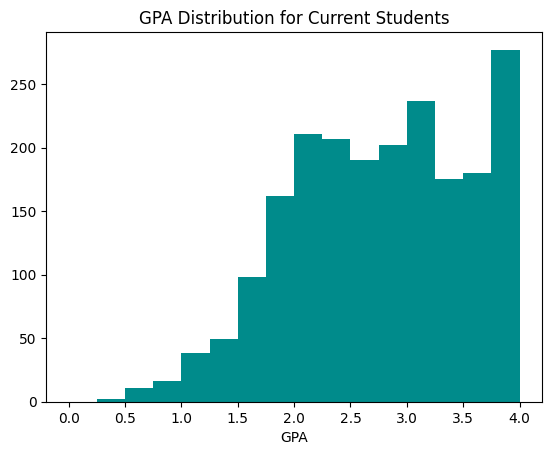

In [0]:
# Histogram for GPA distribution
current_gpa_pd = current_gpa.toPandas()

bins = [x * 0.25 for x in range(17)]
color = 'darkcyan'
plt.hist(current_gpa_pd['gpa'], bins=bins, color=color)
plt.title('GPA Distribution for Current Students')
plt.xlabel('GPA')
plt.show()



# Part I: Grade Distribution by Instructor

In [0]:
# Create faculty_grade_dist DataFrame
faculty_grade_dist  = (
    grades.groupBy('fid')
    .agg(
        expr('COUNT(*) AS N'),
        expr("SUM(CASE WHEN grade = 'A' THEN 1 ELSE 0 END) as countA"),
        expr("SUM(CASE WHEN grade = 'B' THEN 1 ELSE 0 END) as countB"),
        expr("SUM(CASE WHEN grade = 'C' THEN 1 ELSE 0 END) as countC"),
        expr("SUM(CASE WHEN grade = 'D' THEN 1 ELSE 0 END) as countD"),
        expr("SUM(CASE WHEN grade = 'F' THEN 1 ELSE 0 END) as countF")
        )
    .join(faculty, on='fid')
    .select('fid', 'first_name', 'last_name', 'N', 
            expr("ROUND(countA / N, 2) as propA"),
        expr("ROUND(countB / N, 2) as propB"),
        expr("ROUND(countC / N, 2) as propC"), 
        expr("ROUND(countD / N, 2) as propD"),
        expr("ROUND(countF / N, 2) as propF")
        )
)

faculty_grade_dist.show(5)

+----+----------+---------+----+-----+-----+-----+-----+-----+
| fid|first_name|last_name|   N|propA|propB|propC|propD|propF|
+----+----------+---------+----+-----+-----+-----+-----+-----+
|1088| Stephanie| Williams|1666| 0.17| 0.32| 0.36| 0.13| 0.01|
|1238|    Willie|    Black| 682| 0.48| 0.33| 0.15| 0.04| 0.01|
|1829|     Bobby|   Wilson| 640| 0.13| 0.26| 0.37|  0.2| 0.04|
|1025|  Patricia|   Rogers|2950|  0.3| 0.33|  0.3| 0.07|  0.0|
|1084|     Susan|  Edwards|  80| 0.14| 0.36| 0.38| 0.11| 0.01|
+----+----------+---------+----+-----+-----+-----+-----+-----+
only showing top 5 rows



In [0]:
# Faculty members with at least 100 A grades
(
faculty_grade_dist
.filter(expr('N < 100'))
.orderBy('propA')
).show(10)

+----+----------+---------+---+-----+-----+-----+-----+-----+
| fid|first_name|last_name|  N|propA|propB|propC|propD|propF|
+----+----------+---------+---+-----+-----+-----+-----+-----+
|1214|     Joyce|   Hunter|  4|  0.0| 0.75| 0.25|  0.0|  0.0|
|1637|     Jesse|    Smith|  6|  0.0| 0.67| 0.33|  0.0|  0.0|
|1018|      Sean|    Brown|  2|  0.0|  0.5|  0.5|  0.0|  0.0|
|1193|     Nancy|Alexander|  5|  0.0|  0.6|  0.2|  0.2|  0.0|
|2082|     Jerry|    Perry| 39| 0.05| 0.18| 0.49| 0.18|  0.1|
|1908|      Kyle|    Henry| 66| 0.06| 0.23| 0.29|  0.3| 0.12|
|2084| Christine| Crawford| 68| 0.06| 0.19| 0.35| 0.25| 0.15|
|1448|     Linda|   Hunter| 27| 0.07| 0.33| 0.33| 0.22| 0.04|
|1927|     Amber|     Gray| 85| 0.07| 0.25| 0.39|  0.2| 0.09|
|1078| Christine|  Edwards| 37| 0.08| 0.38|  0.3| 0.16| 0.08|
+----+----------+---------+---+-----+-----+-----+-----+-----+
only showing top 10 rows



In [0]:
# Faculty members with most A grades
(
faculty_grade_dist
.filter(expr('N > 100'))
.orderBy('propA', ascending=False)
).show(10)

+----+----------+---------+----+-----+-----+-----+-----+-----+
| fid|first_name|last_name|   N|propA|propB|propC|propD|propF|
+----+----------+---------+----+-----+-----+-----+-----+-----+
|1092|    Hannah|   Morgan|1953| 0.59|  0.3| 0.09| 0.01|  0.0|
|1262|      Sara|   Hunter|2266| 0.57| 0.28| 0.12| 0.02|  0.0|
|1094|      Judy|Patterson|1904| 0.55| 0.32| 0.12| 0.02|  0.0|
|1548|    Donald|   Gibson|1478| 0.55| 0.27| 0.14| 0.03| 0.01|
|1484|     Billy|   Cooper| 434| 0.54| 0.33| 0.09| 0.04| 0.01|
|1058|      John|  Simpson|2729| 0.53| 0.33| 0.12| 0.02|  0.0|
|1328|     David|   Parker|1543| 0.53| 0.28| 0.14| 0.04| 0.01|
|1038|   Theresa|  Stevens| 233| 0.52| 0.31| 0.15| 0.02| 0.01|
|1291|     Joyce|   Butler|2212| 0.51| 0.31| 0.14| 0.03| 0.01|
|1305|     Betty|  Stewart|2081| 0.51| 0.31| 0.14| 0.04| 0.01|
+----+----------+---------+----+-----+-----+-----+-----+-----+
only showing top 10 rows



## Part J: First Term GPA

In [0]:
# Create first_term_gpa DataFrame
first_term_gpa = (
    grades.join(accepted, on='sid', how='inner')
    .filter(expr('term_id == acc_term_id'))
    .withColumn('num_grades', udf_grade_to_numeric(expr('grade')))
    .groupBy('sid')
    .agg(
        expr('SUM(num_grades) as total_gp'),
        expr('COUNT(*) as total_courses')
    )
    .withColumn('first_term_gpa', expr('ROUND(total_gp / total_courses, 2)'))  
    .select('sid', 'first_term_gpa')
)

# Print 5 rows
first_term_gpa.show(5)

+------+--------------+
|   sid|first_term_gpa|
+------+--------------+
|100170|           2.0|
|100446|           3.8|
|100800|           0.4|
|100884|           2.0|
|100986|          0.33|
+------+--------------+
only showing top 5 rows



## Part K: Graduation Rates and First Term GPA

In [0]:
# Function to represent specific GPA ranges
from pyspark.sql.types import StringType
def classify_gpa(gpa):
    if 0 <= gpa < 1:
        return '[0,1)'
    elif 1 <= gpa < 2:
        return '[1,2)'
    elif 2 <= gpa < 3:
        return '[2,3)'
    elif 3 <= gpa <= 4:
        return '[3,4]'
    else:
        return 'Invalid GPA'

# Register the UDF function
udf_classify_gpa = udf(classify_gpa, StringType())

In [0]:
# Create alumni_ft_gpa DataFrame
alumni_ft_gpa = (
    first_term_gpa
    .join(alumni, on='sid', how='inner')
    .withColumn('gpa_bin', udf_classify_gpa('first_term_gpa'))
    .groupBy('gpa_bin')
    .agg(expr('count(sid) as n_alumni'))
    .orderBy('gpa_bin')
)

# Show results
alumni_ft_gpa.show()

+-------+--------+
|gpa_bin|n_alumni|
+-------+--------+
|  [0,1)|       3|
|  [1,2)|     528|
|  [2,3)|    1860|
|  [3,4]|    2529|
+-------+--------+



In [0]:
# Create former_ft_gpa DataFrame
former_ft_gpa = (
    first_term_gpa
    .join(former, on='sid', how='inner')
    .withColumn('gpa_bin', udf_classify_gpa('first_term_gpa'))
    .groupBy('gpa_bin')
    .agg(expr('count(sid) as n_former'))
    .orderBy('gpa_bin')
)
former_ft_gpa.show(10)

+-------+--------+
|gpa_bin|n_former|
+-------+--------+
|  [0,1)|     800|
|  [1,2)|    1727|
|  [2,3)|    2409|
|  [3,4]|    2676|
+-------+--------+



In [0]:
# Graduation rates
from pyspark.sql import functions as F
combined_gpa = (
    alumni_ft_gpa
    .join(former_ft_gpa, on='gpa_bin', how='outer')
    .select('gpa_bin', 'n_alumni', 'n_former')
    .withColumn('grad_rate', 
        F.expr("ROUND(n_alumni / NULLIF(n_former, 0), 2)")
    )
    .orderBy('gpa_bin')
)

# Show results
combined_gpa.show()

+-------+--------+--------+---------+
|gpa_bin|n_alumni|n_former|grad_rate|
+-------+--------+--------+---------+
|  [0,1)|       3|     800|      0.0|
|  [1,2)|     528|    1727|     0.31|
|  [2,3)|    1860|    2409|     0.77|
|  [3,4]|    2529|    2676|     0.95|
+-------+--------+--------+---------+

